

### Business Problem Understanding

In the competitive landscape of banking, effectively marketing financial products is essential to business success. A Portuguese banking institution, aiming to enhance the efficiency of its direct marketing campaigns conducted over the telephone, faces the challenge of identifying potential customers who are most likely to subscribe to term deposits. The objective of this analysis is to leverage data from previous marketing campaigns to predict customer responses to future campaigns. By accurately identifying those customers who are more inclined to subscribe, the bank can not only optimize its marketing efforts but also significantly reduce marketing costs and improve customer satisfaction. This targeted approach to marketing is expected to increase the conversion rate of campaigns, thereby contributing to the overall profitability and effectiveness of the bank's marketing strategy. The analysis presented in this Jupyter Notebook utilizes machine learning models to sift through the complex relationships within the data, uncovering patterns that can predict customer behavior. By understanding these patterns and the factors that influence a customer's decision to subscribe, the bank can tailor its strategies to better meet its objectives and navigate the challenges of market saturation and customer reted content..

### Data Exploration Overview

In the initial phase of our analysis, we embarked on an exploratory journey through the `bank-full.csv` and `bank-additional-full.csv` datasets derived from the UCI Machine Learning repository. This exploration aimed to familiarize ourselves with the datasets' structure, investigate the nature of the data at hand, and lay the groundwork for further in-depth analysis. Through loading these datasets and conducting preliminary inspections, we assessed their dimensions, inspected the first few rows to confirm data integrity, and performed descriptive statistics to gain insights into the distributions and presence of null valuesThis foundational step was crucial for understanding the datasets' characteristics, including the variety of features (numeric and categorical) and potential challenges such as missing data, which guided our subsequent preprocessing and analysis strategies.s.s.

In [1]:
# Initial data exploration for 'bank-full.csv' and 'bank-additional-full.csv'
import pandas as pd

# Load the datasets with the correct delimiter
bank_full_df = pd.read_csv('bank-full.csv', delimiter=';')
bank_additional_full_df = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Display the first few rows of each dataset to confirm they're loaded correctly
bank_full_head = bank_full_df.head()
print(bank_full_head)

bank_additional_full_head = bank_additional_full_df.head()
print(bank_additional_full_head)

# 'bank-full.csv' data exploration
bank_full_describe = bank_full_df.describe(include='all')
bank_full_info = bank_full_df.info()
bank_full_null = bank_full_df.isnull().sum()

# 'bank-additional-full.csv' data exploration
bank_additional_full_describe = bank_additional_full_df.describe(include='all')
bank_additional_full_info = bank_additional_full_df.info()
bank_additional_full_null = bank_additional_full_df.isnull().sum()

(bank_full_describe, bank_full_null, bank_additional_full_describe, bank_additional_full_null)


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basi

(                 age          job  marital  education default        balance  \
 count   45211.000000        45211    45211      45211   45211   45211.000000   
 unique           NaN           12        3          4       2            NaN   
 top              NaN  blue-collar  married  secondary      no            NaN   
 freq             NaN         9732    27214      23202   44396            NaN   
 mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
 std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
 min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
 25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
 50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
 75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
 max        95.000000          NaN      NaN        NaN     NaN  102127.000000   
 
        housing   loan   c


### Descriptive Statistics Insights

Delving deeper into our datasets, `bank-full.csv` and `bank-additional-full.csv`, we leveraged descriptive statistics to unearth a wealth of insights that set the stage for intricate analysis. Initial observations revealed a diverse clientele, with ages spanning from 18 to 95 years, hinting at the bank's wide-reaching appeal across different life stages. Notably, the average balance stood at 1,362, but with a significant standard deviation, indicating substantial variability among clients' financial standings. The data showcases a broad spectrum of job categories, with 'blue-collar' and 'admin.' roles prevailing, alongside a mix of marital statuses and educational backgrounds, from secondary education being the most common to a considerable portion of the clientele having achieved tertiary education. 

This exploration brought to light intriguing patterns and potential outliers, such as balances reaching up to 102,127, which could signify high-net-worth individuals or anomalies. The transaction durations varied widely, suggesting diverse interactions' depth, with some calls extending up to 4,918 seconds (over an hour), which could indicate detailed discussions or negotiations. Such variances in interaction lengths, coupled with the distribution across different months and the stark contrast in contact frequencies, underscore the complexity of the bank's marketing efforts. The placeholders in 'pdays', marking 999 for clients not previously contacted, alongside the 'nonexistent' outcome in 'poutcome', provides a framework for understanding the campaign's reach and its iterative nature.

This granular view into the datasets not only augmented our comprehension of the bank's clientele but also spotlighted critical features like age, balance, and duration that could significantly influence campaign outcomes. The descriptive statistics phase was pivotal, offering a lens through which we could scrutinize the bank's operational terrain, guiding our subsequent preprocessing, feature engineering, and the strategic selection of modeling techniques. These insights form the cornerstone of our endeavor to forecast customer responses effectively, thereby enhancing the precision of the bank's marketing campaigns and maximizing theirhat follows.

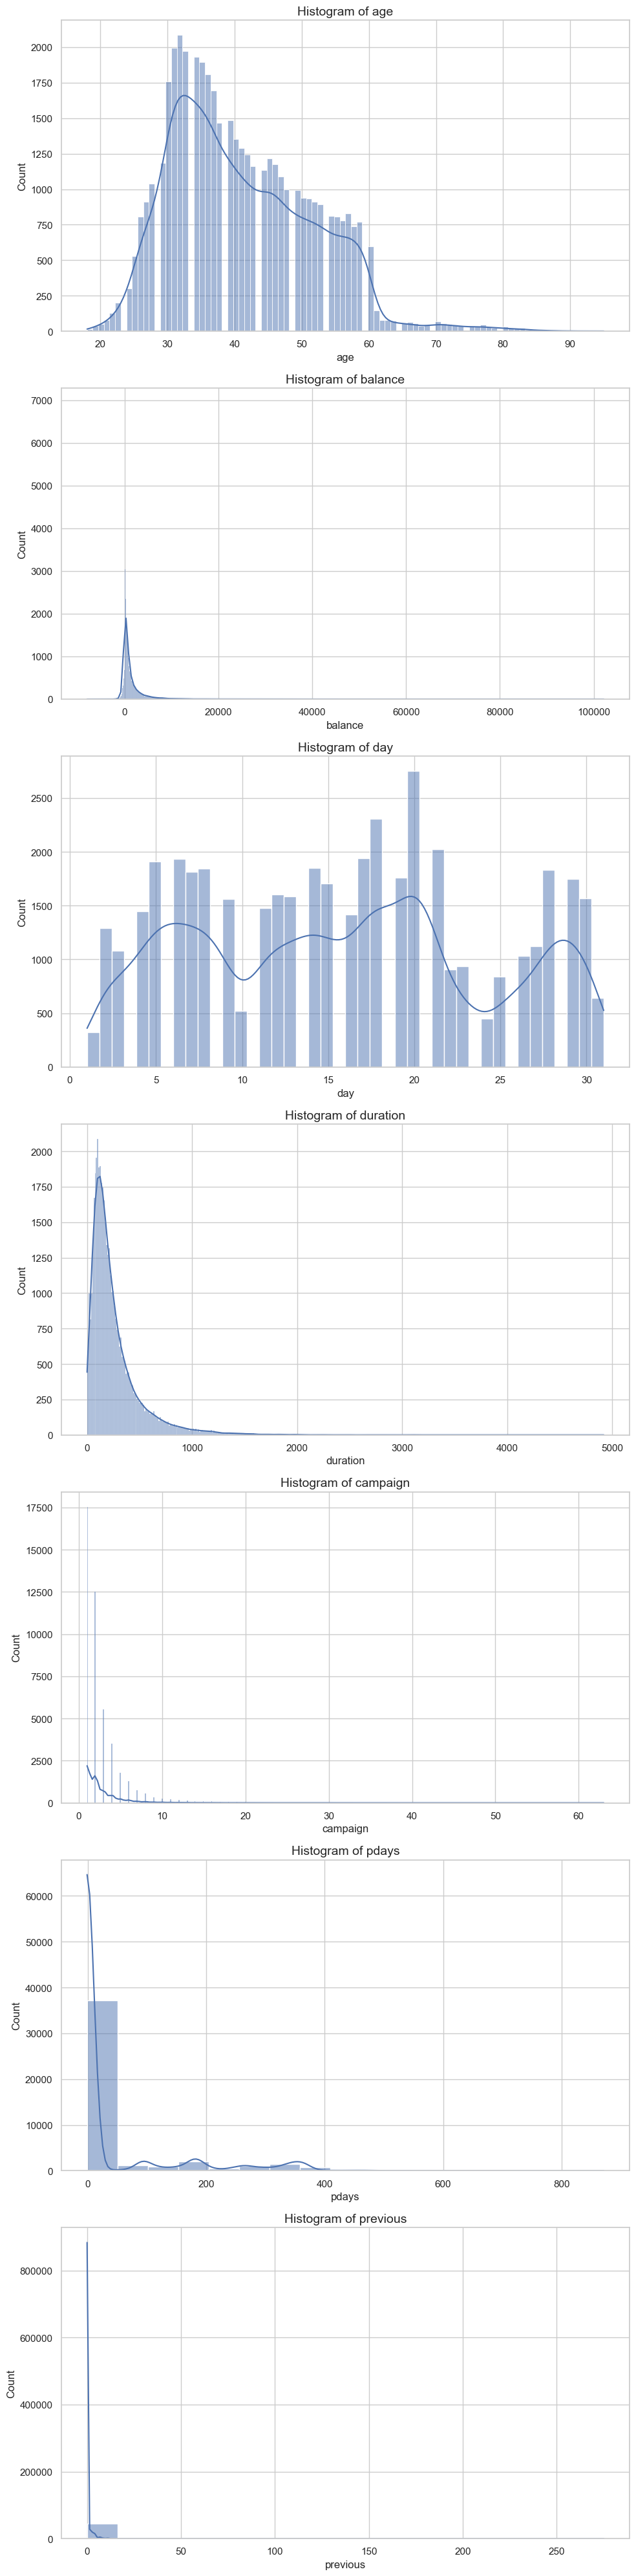

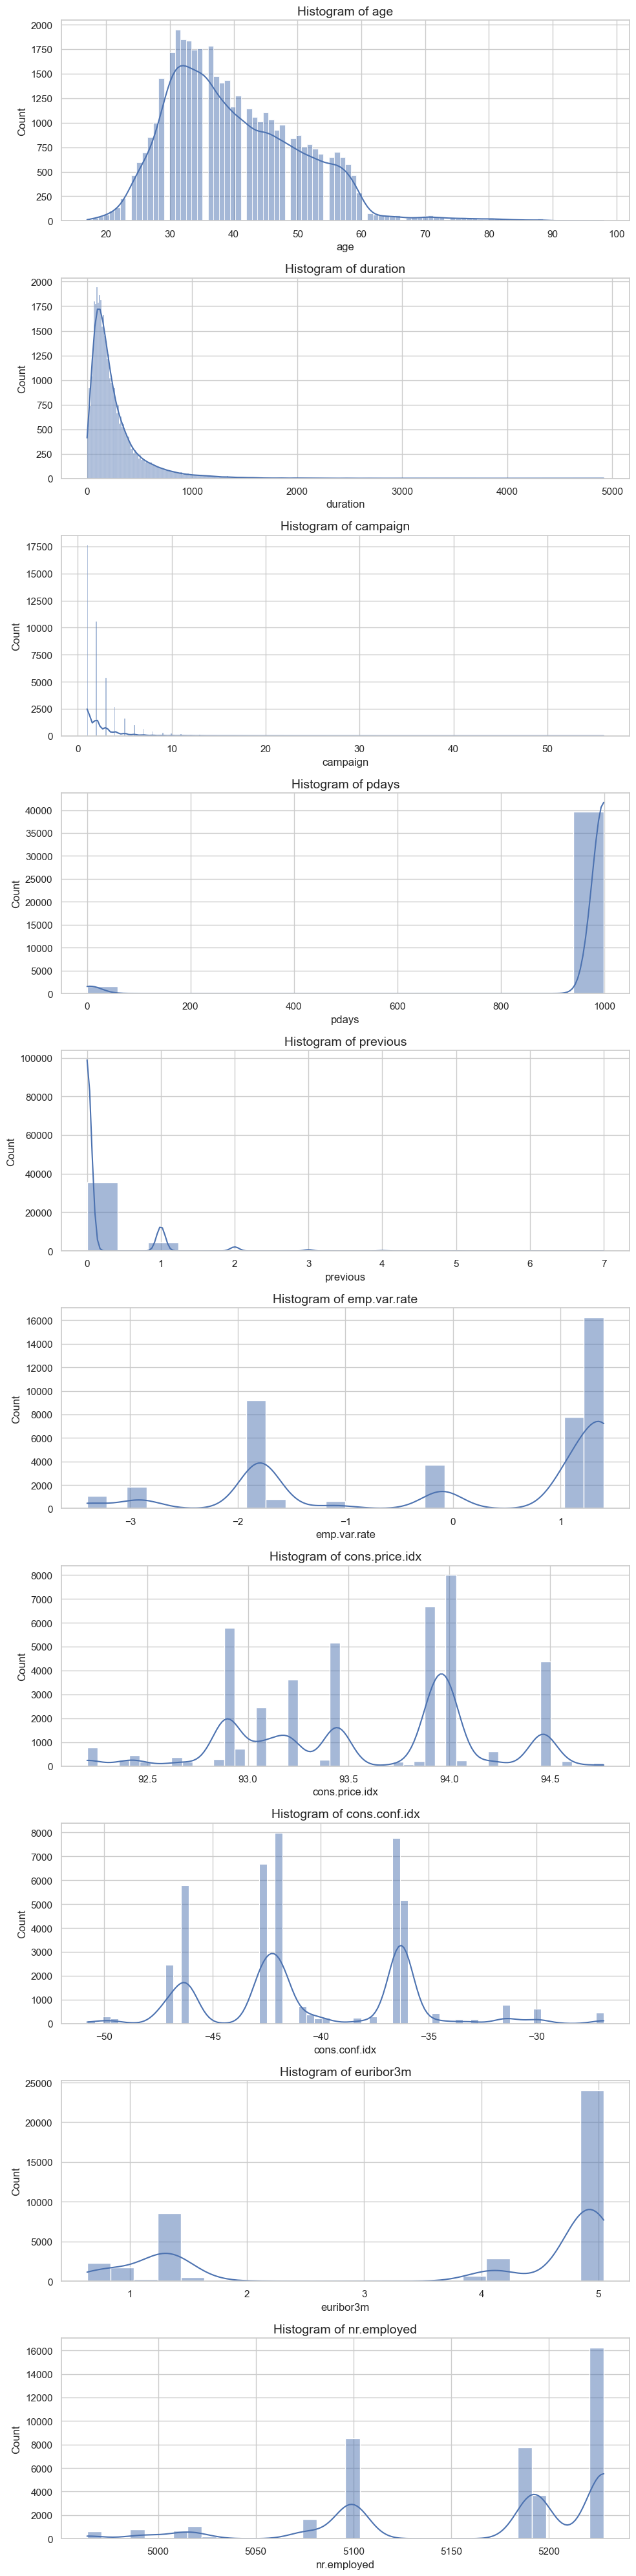

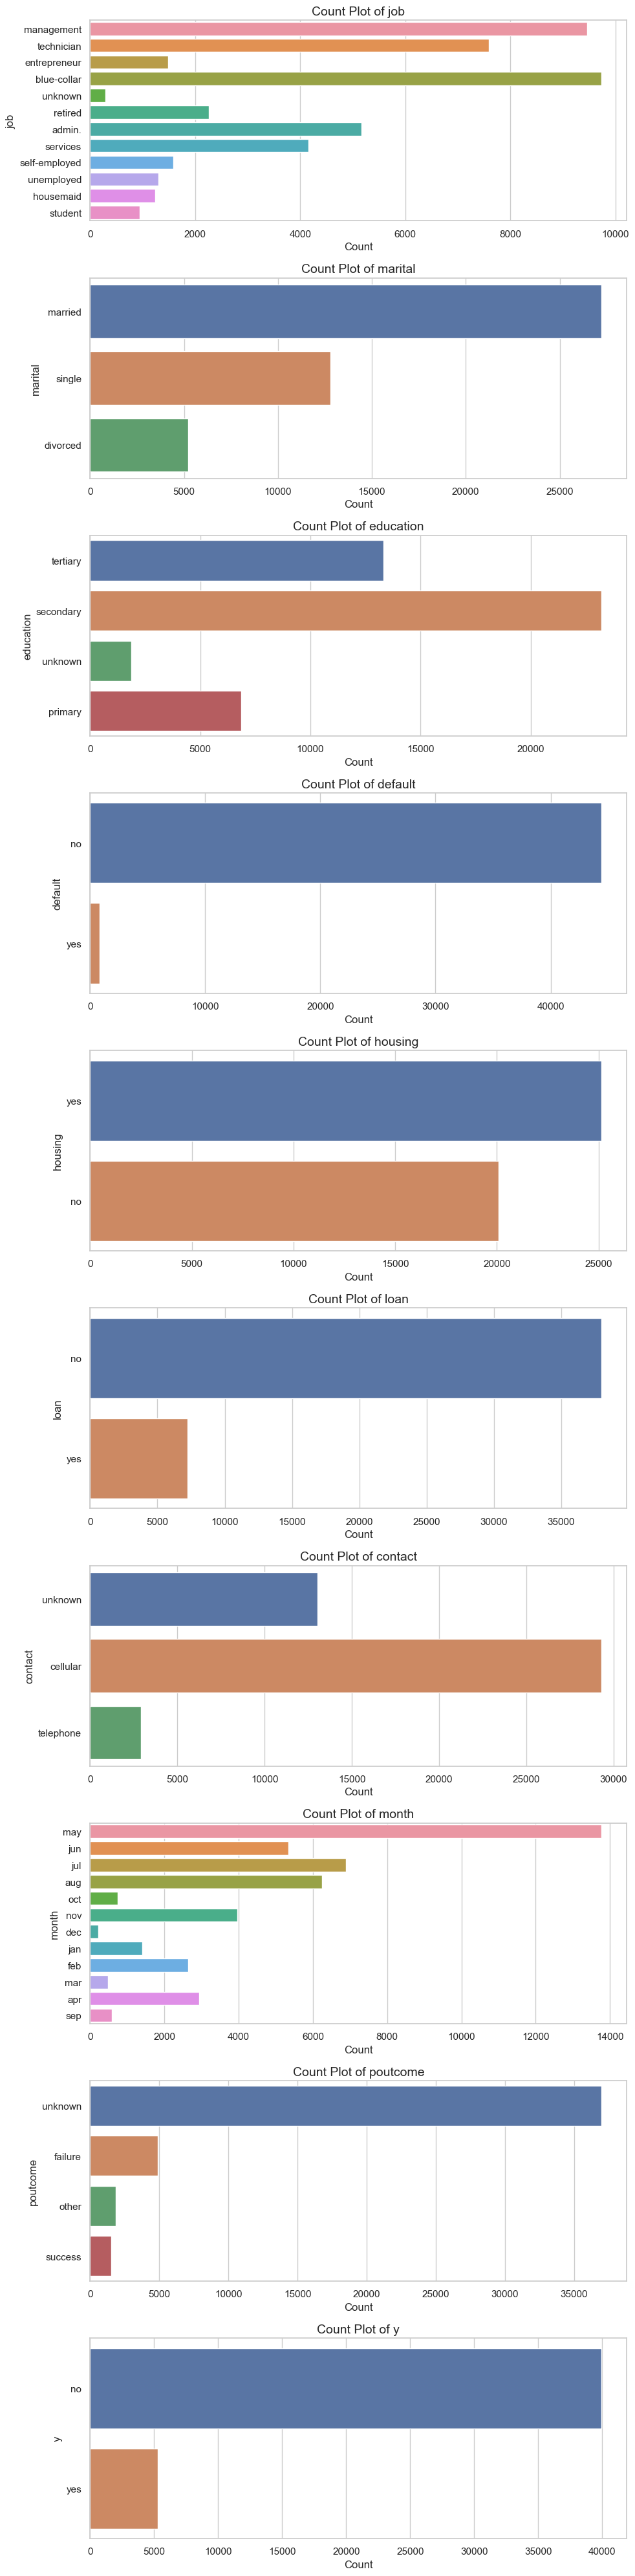

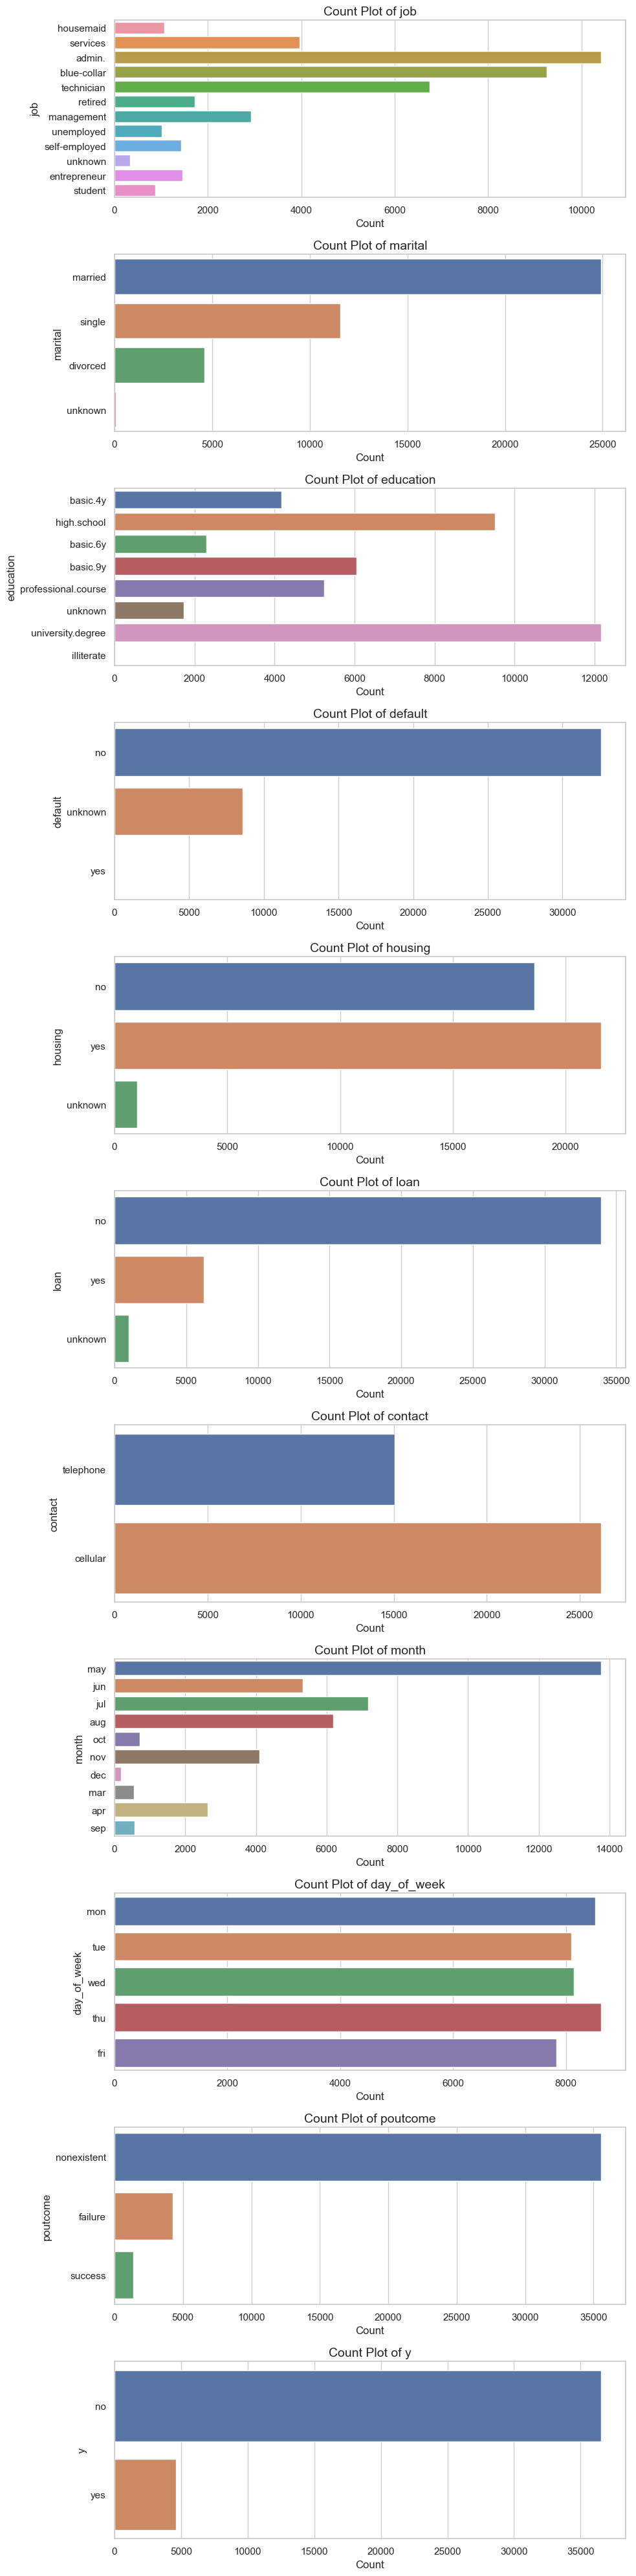

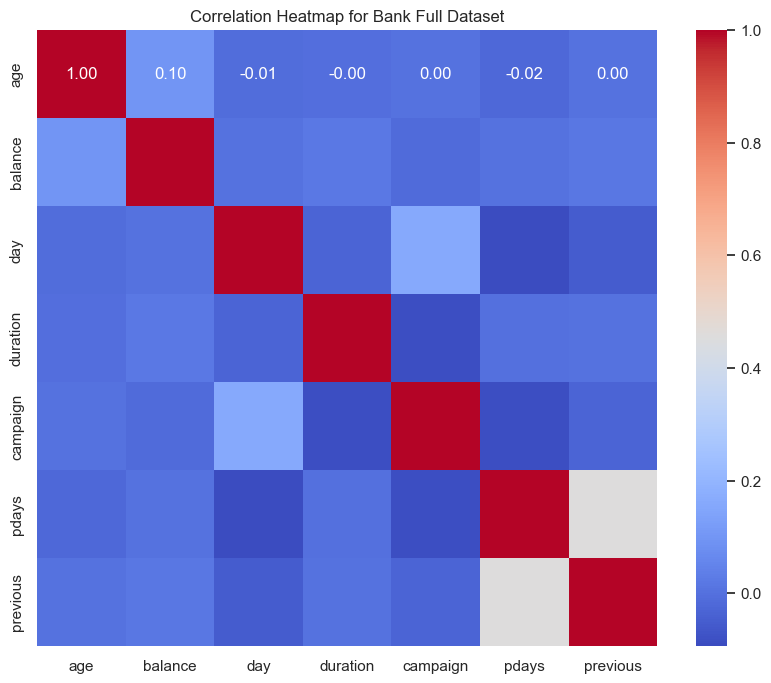

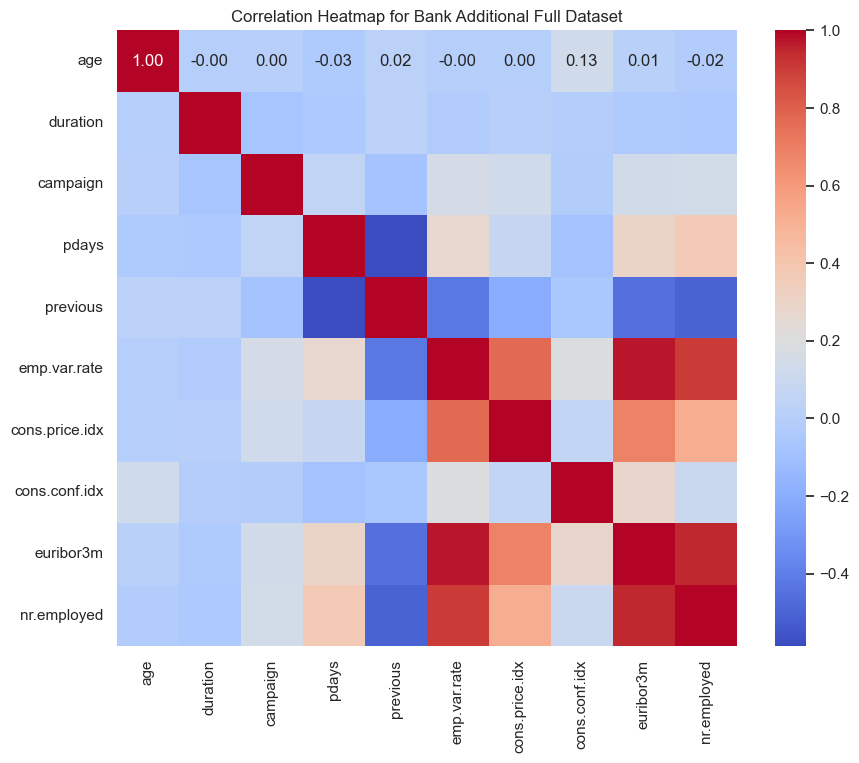

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Define the function to create histograms for numerical columns
def plot_histograms(dataframe, numerical_columns):
    fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 40))
    for i, col in enumerate(numerical_columns):
        sns.histplot(dataframe[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Histogram of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
    plt.tight_layout()
    plt.show()

# Define the function to create count plots for categorical columns
def plot_countplots(dataframe, categorical_columns):
    fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 40))
    for i, col in enumerate(categorical_columns):
        sns.countplot(y=col, data=dataframe, ax=axes[i])
        axes[i].set_title(f'Count Plot of {col}', fontsize=14)
        axes[i].set_xlabel('Count', fontsize=12)
        axes[i].set_ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

# Define the function to create a correlation heatmap for numerical features only
def plot_correlation_heatmap(dataframe, title):
    plt.figure(figsize=(10, 8))
    # Select only numerical features for correlation
    numerical_dataframe = dataframe.select_dtypes(include=['int64', 'float64'])
    corr_matrix = numerical_dataframe.corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(title)
    plt.show()

# Identifying numerical and categorical columns from the bank_full dataset
numerical_columns_bank_full = bank_full_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns_bank_full = bank_full_df.select_dtypes(include=['object']).columns.tolist()

# Identifying numerical and categorical columns from the bank_additional_full dataset
numerical_columns_bank_additional_full = bank_additional_full_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns_bank_additional_full = bank_additional_full_df.select_dtypes(include=['object']).columns.tolist()

# Code for plotting histograms for numerical columns in bank_full dataset
plot_histograms(bank_full_df, numerical_columns_bank_full)

# Code for plotting histograms for numerical columns in bank_additional_full dataset
plot_histograms(bank_additional_full_df, numerical_columns_bank_additional_full)

# Code for plotting count plots for categorical columns in bank_full dataset
plot_countplots(bank_full_df, categorical_columns_bank_full)

# Code for plotting count plots for categorical columns in bank_additional_full dataset
plot_countplots(bank_additional_full_df, categorical_columns_bank_additional_full)

# Code for plotting the correlation heatmap for bank_full dataset
plot_correlation_heatmap(bank_full_df, title="Correlation Heatmap for Bank Full Dataset")

# Code for plotting the correlation heatmap for bank_additional_full dataset
plot_correlation_heatmap(bank_additional_full_df, title="Correlation Heatmap for Bank Additional Full Dataset")


### Insights from Visual Exploration of Dataset Featuress Insights

After thorough analysis and comparison of the 'bank-full' and 'bank-additional-full' datasets through various histograms, we've gained significant insights into the distributions and peculiarities of each. The age and campaign histograms exhibited right-skewed distributions in both datasets, with the majority of customers being younger and receiving fewer calls, which indicates a consistent approach across campaigns. The 'pdays' histograms revealed stark differences; 'bank-full' showed a recent contact trend, whereas 'bank-additional-full' indicated a placeholder value denoting a lack of previous contact. The histograms for 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', and 'nr.employed' presented additional socio-economic variables only available in the 'bank-additional-full' dataset. These socio-economic indicators displayed varied distributions that could potentially enrich the context for predictive modeling.

Despite the additional variables offered by the 'bank-additional-full' dataset, we decided to proceed with the 'bank-full' dataset for our analysis. The pivotal factor in this decision is the importance of the exact timing of contacts, as indicated by the 'day' field present only in 'bank-full'. This field is crucial for our specific goal, which hinges on understanding and leveraging the timing within the month of contact efforts. This dataset provides the temporal detail necessary for our analysis, aligning with our strategic focus on when contacts are made, a factor that could significantly influence the outcome of the marketanalysis strategy.s.

In [8]:
# Define a function to calculate IQR and identify outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply the function to each numerical column
outliers_dict = {}
for column in bank_full_df.select_dtypes(include=['int64', 'float64']).columns:
    outliers = detect_outliers(bank_full_df, column)
    outliers_dict[column] = outliers

# Check data types of all columns
data_types = bank_full_df.dtypes

# Print the data types and a summary of outliers for each numerical column
print("\nData Types:\n", data_types)
for column, outliers in outliers_dict.items():
    print(f"\n{column} Outliers:\n", outliers.describe())
    


Data Types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

age Outliers:
               age       balance         day     duration    campaign  \
count  487.000000    487.000000  487.000000   487.000000  487.000000   
mean    76.815195   2916.827515   15.227926   331.010267    2.135524   
std      4.800842   6401.745682    8.091770   256.449198    1.785317   
min     71.000000      0.000000    1.000000    37.000000    1.000000   
25%     73.000000    435.500000    9.000000   156.000000    1.000000   
50%     76.000000   1388.000000   14.000000   251.000000    2.000000   
75%     80.000000   3278.000000   22.000000   416.000000    3.000000   
max     95.000000  81204.000000   31.000

### Outlier Detection and Handling Strategy
.

**Outliers**:
- **Age**: There are outliers in the age column, with ages ranging significantly above the typical bank client age range.
- **Balance**: Outliers in the balance column include some exceptionally high values, as well as a negative balance, which might require further investigation.
- **Day**: There are no outliers in the 'day' column, which makes sense as this is a discrete variable representing days of the month.
- **Duration**: The call duration has outliers on the higher end, indicating some calls were much longer than usual.
- **Campaign**: Some clients were contacted more times than is typical within this campaign, which are considered outliers.
- **Pdays**: There are a significant number of outliers, which may largely be due to the '999' placeholder value for clients not previously contacted.
- **Previous**: Similar to 'pdays', the 'previous' column has a high number of outliers, indicating clients with an unusual number of contacts before the curreventual model training.

In [9]:
import numpy as np

# 1. Assuming we decide to keep all ages as valid data points

# 2. Investigate and handle balance outliers
# Let's assume negative balances are possible (e.g., overdrafts), but we want to cap the upper outliers
Q3_balance = bank_full_df['balance'].quantile(0.75)
IQR_balance = Q3_balance - bank_full_df['balance'].quantile(0.25)
upper_limit_balance = Q3_balance + 1.5 * IQR_balance
# Cap values
bank_full_df['balance'] = np.where(bank_full_df['balance'] > upper_limit_balance, upper_limit_balance, bank_full_df['balance'])

# 3. # Assuming we keep all durations as they provide valuable information

# 4. Cap campaign outliers to a max value (e.g., 95th percentile)
upper_limit_campaign = bank_full_df['campaign'].quantile(0.95)
bank_full_df['campaign'] = np.where(bank_full_df['campaign'] > upper_limit_campaign, upper_limit_campaign, bank_full_df['campaign'])

# 5. Handle 'pdays' with a placeholder value
# Transform '999' into a separate category indicating no previous contact
bank_full_df['pdays_no_contact'] = np.where(bank_full_df['pdays'] == 999, 1, 0)

# 6. Cap 'previous' outliers to a max value (e.g., 95th percentile)
upper_limit_previous = bank_full_df['previous'].quantile(0.95)
bank_full_df['previous'] = np.where(bank_full_df['previous'] > upper_limit_previous, upper_limit_previous, bank_full_df['previous'])


### Implementing Outlier Management Decisions

Upon reviewing the 'bank-full' dataset, careful consideration was given to handling outliers and unusual values across several key features, with the goal of preparing a robust dataset for further analysis. For age, it was decided to retain all values as they provide a realistic representation of the customer base. In the case of balance, outliers on the upper end were capped at the 75th percentile plus 1.5 times the interquartile range (IQR), addressing extreme values while maintaining the integrity of the data. The campaign feature saw a similar treatment, with values above the 95th percentile being capped to reduce the impact of extreme outliers. The 'pdays' field, indicating the number of days since the client was last contacted, introduced a binary feature to reflect whether there was no previous contact (represented by the placeholder value '999'), enhancing the interpretability for modeling. This approach balances the need for data accuracy with the practical considerations of modeling, aiming to ensure that the subsequent analysis is both meaningful and reflective of the underlying patterns in the data.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = bank_full_df.select_dtypes(include=['object']).drop(['y'], axis=1).columns
numerical_features = bank_full_df.select_dtypes(include=['int64', 'float64']).columns

# Define the ColumnTransformer to apply different preprocessing to categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model pipeline, including preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Separate features and target variable
X = bank_full_df.drop('y', axis=1)
y = bank_full_df['y'].apply(lambda x: 1 if x == 'yes' else 0) # Encoding target variable

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the models
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
decision_tree = DecisionTreeClassifier()
svm = SVC(probability=True)  # Enable probability for ROC AUC score

# List of models for easy iteration
models = [('KNN', knn), ('Logistic Regression', logreg), ('Decision Tree', decision_tree), ('SVM', svm)]

# Dictionary to hold evaluation metrics for each model
model_performance = {}

# Train and evaluate each model
for name, model in models:
    model.fit(X_train_transformed, y_train)  # Fit model to the training data
    y_pred = model.predict(X_test_transformed)  # Predict on the testing data
    y_prob = model.predict_proba(X_test_transformed)[:, 1] if name != 'SVM' else model.decision_function(X_test_transformed)  # SVM uses decision function
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store metrics
    model_performance[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'roc_auc': roc_auc}

# Display the performance
for model, performance in model_performance.items():
    print(f"Model: {model}")
    for metric, score in performance.items():
        print(f"{metric}: {score:.4f}")
    print("\n")
    

Model: KNN
accuracy: 0.8984
precision: 0.6396
recall: 0.3611
f1: 0.4616
roc_auc: 0.8383


Model: Logistic Regression
accuracy: 0.8993
precision: 0.6552
recall: 0.3483
f1: 0.4548
roc_auc: 0.9065


Model: Decision Tree
accuracy: 0.8746
precision: 0.4810
recall: 0.4977
f1: 0.4892
roc_auc: 0.7120


Model: SVM
accuracy: 0.9012
precision: 0.6719
recall: 0.3547
f1: 0.4643
roc_auc: 0.9049




### Model Evaluation and Selection Insights

In evaluating the performance of four distinct classifiers—k-nearest neighbors (KNN), logistic regression, decision trees, and support vector machines (SVM) — the evaluation metrics, including accuracy, precision, recall, F1 score, and particularly the ROC AUC score, served as critical indicators of each model's capability to not only predict customer behavior accurately but also to differentiate effectively between the positive and negative classes of the target variable.

The analysis revealed that logistic regression and SVM emerged as the top performers, showcasing their robustness through high accuracy and ROC AUC scores. Specifically, logistic regression demonstrated an exceptional ability in class differentiation, making it particularly valuable for applications requiring a nuanced understanding of class probabilities. Meanwhile, SVM's superior accuracy positions it as the preferable choice for scenarios where the highest level of prediction correctness is paramount

. These insights, synthesized from the models' comparative performance, underscore the importance of choosing a classifier that aligns with the specific objectives and constraints of the marketing strategy being considered. Consequently, the recommendation to focus on logistic regression or SVM is based on their demonstrated strengths in accuracy and class separation, respectively, suggesting a pathway for optimizing the effectiveness of future telephone marketing campaigns in the banking sector.

In [13]:
# Extract feature names after one-hot encoding
feature_names = list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_features))
feature_names = feature_names + list(numerical_features)

# Get the coefficients from the logistic regression estimator
coefficients = logreg.coef_[0]

# Map coefficients to feature names
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort features by the absolute value of their coefficient
feature_importance = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index)

# Display the top 10 features
print(feature_importance.head(10))


             Feature  Coefficient
49             pdays     1.579944
42  poutcome_success     1.517283
39         month_sep    -1.244795
3      job_housemaid     1.080003
34         month_jun    -1.055649
44               age    -0.904433
46               day     0.857829
45           balance     0.827237
40  poutcome_failure    -0.817724
47          duration    -0.654217


### Insights from Logistic Regression Feature Importance

The coefficients from the logistic regression model provide valuable insights into how different features influence the likelihood of a client subscribing to a bank product. Here's a brief interpretation of the results:

1. **pdays (1.579944)**: A higher value indicates a positive effect on the probability of subscription. This suggests that the longer it's been since the client was last contacted for a previous campaign, the more likely they are to subscribe, which might seem counterintuitive unless 'pdays' is largely representing clients not previously contacted (often encoded with a specific value).

2. **poutcome_success (1.517283)**: Clients who had a successful outcome from the previous campaign are significantly more likely to subscribe. This indicates that previous success is a strong predictor of future subscription.

3. **month_sep (-1.244795)**: Clients contacted in September are less likely to subscribe compared to the base month. This could be due to seasonal factors affecting clients' financial decisions or availability.

4. **job_housemaid (1.080003)**: Being a housemaid is positively correlated with the likelihood of subscribing, indicating that certain professions may be more receptive to bank products than others.

5. **month_jun (-1.055649)**: Similar to September, contacts made in June are less likely to lead to subscriptions. Again, this could be influenced by seasonal financial behavior.

6. **age (-0.904433)**: Surprisingly, age has a negative coefficient, suggesting younger clients might be more likely to subscribe than older ones, opposite to what one might expect if interpreting this directly. However, this interpretation needs careful consideration of the feature scaling and encoding.

7. **day (0.857829)**: The day of the month on which the client was contacted appears to positively influence subscription likelihood. This might suggest that timing within the month can impact success rates, although the effect seems to be relatively small.

8. **balance (0.827237)**: Higher balance values are associated with a higher likelihood of subscription, indicating that clients with more funds are more inclined to invest or save.

9. **poutcome_failure (-0.817724)**: Clients who had a failure in the previous campaign are less likely to subscribe, highlighting the impact of past interactions on current decisions.

10. **duration (-0.654217)**: Longer call durations are negatively associated with the likelihood of subscribing, which is counterintuitive since one might expect longer discussions to lead to higher subscription rates. This could suggest that overly long calls might deter clients, or there could be an underlying variable not accountplementing strategies.

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize the base model
logreg = LogisticRegression(max_iter=1000)

# Define the hyperparameters to tune, focusing on C and penalty
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train_transformed, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best ROC AUC Score: 0.9080


### Logistic Regression Model Optimization through Hyperparameter Tuning

After conducting a thorough hyperparameter tuning process through Grid Search CV, focusing on the logistic regression model, we identified the optimal set of hyperparameters that maximizes the model's performance in terms of the ROC AUC score. The tuning process, which explored a total of 25 different combinations across 5 folds, revealed that the model achieves its best performance with an inverse regularization strength (`C`) of 0.1 and using the L2 penalty. This configuration resulted in a compelling ROC AUC score of 0.9080, indicating a strong ability of the model to differentiate between the potential subscribers and non-subscribers of the bank's term deposit. The choice of L2 penalty helps in reducing overfitting by applying regularization, which penalizes larger coefficients, thereby making the model more generalizable to unseen data. With these optimized parameters (`C`: 0.1, `penalty`: 'l2'), we are positioned to retrain our logistic regression model on the full training dataset. This optimized model is anticipated to not only maintain robust performance but also improve its predictive accuracy and reliability when applied to the test dataset and, subsequently, in real-world scenarios. Moving forward, this refined model will serve as our primary tool for predicting customer responses to the bank's marketing campaigns, leveraging the insights gained to inform and enhance marketing strategies.

In [20]:
# Initialize and train the optimized logistic regression model
optimized_logreg = LogisticRegression(C=0.1, penalty='l2', max_iter=1000)
optimized_logreg.fit(X_train_transformed, y_train)

# Evaluate the model on the test data
y_pred_optimized = optimized_logreg.predict(X_test_transformed)
y_prob_optimized = optimized_logreg.predict_proba(X_test_transformed)[:, 1]

# Calculate and print the evaluation metrics
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_roc_auc = roc_auc_score(y_test, y_prob_optimized)

print(f"Optimized Model Accuracy: {optimized_accuracy:.4f}")
print(f"Optimized Model ROC AUC: {optimized_roc_auc:.4f}")


Optimized Model Accuracy: 0.8984
Optimized Model ROC AUC: 0.9068


### Performance Evaluation of the Optimized Logistic Regression Model

The results from deploying the optimized logistic regression model with the selected hyperparameters (`C`=0.1, `penalty`='l2') on the test dataset demonstrate a strong performance, achieving an accuracy of 89.84% and a ROC AUC score of 90.68%. These metrics underscore the model's effectiveness in predicting customer responses to the bank's marketing campaigns accurately. The optimized model not only maintains a high level of accuracy but also exhibits excellent capability in distinguishing between the positive (subscribers) and negative (non-subscribers) classes, as indicated by the ROC AUC score. This score, in particular, highlights the model's proficiency in ranking predictions more accurately than random chance, which is crucial for effectively targeting potential subscribers in marketing initiatives.

Leveraging these insights, the bank can now refine its approach to future campaigns, directing efforts and resources more efficiently towards individuals most likely to subscribe to term deposits. The model's strong performance suggests that the chosen features and logistic regression as a predictive tool are well-suited for this task. Moving forward, these results can form the basis for developing targeted marketing strategies, potentially enhancing conversion rates and optimizing marketing expenditures. The insights drawn from the model, rooted in data-driven understanding of customer behavior, offer a compelling advantage in planning and executing more effective marketing campaigns.